In [ ]:
import aisdb
from aisdb import DBQuery
from aisdb.database.dbconn import PostgresDBConn
from datetime import datetime, timedelta
from aisdb.discretize.h3 import Discretizer

In [ ]:
# >>> PostgreSQL Information <<<
db_user='<>'            # DB User
db_dbname='<>'         # DB Schema
db_password='<>'    # DB Password
db_hostaddr='127.0.0.1'    # DB Host address

dbconn = PostgresDBConn(
    port=5555,             # PostgreSQL port
    user=db_user,          # PostgreSQL username
    dbname=db_dbname,      # PostgreSQL database
    host=db_hostaddr,      # PostgreSQL address
    password=db_password,  # PostgreSQL password
)

In [17]:
xmin, ymin, xmax, ymax = -70, 45, -58, 53
gulf_bbox = [xmin, xmax, ymin, ymax]
start_time = datetime(2023, 8, 1)
end_time = datetime(2023, 8, 2)

qry = DBQuery(
    dbconn=dbconn,
    start=start_time, end=end_time,
    xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax,
    callback=aisdb.database.sqlfcn_callbacks.in_time_bbox_validmmsi
)

ais_tracks = []
rowgen = qry.gen_qry()

In [18]:
descritizer = Discretizer(resolution=6)

# Creating discretizer object and describe based on its resolution

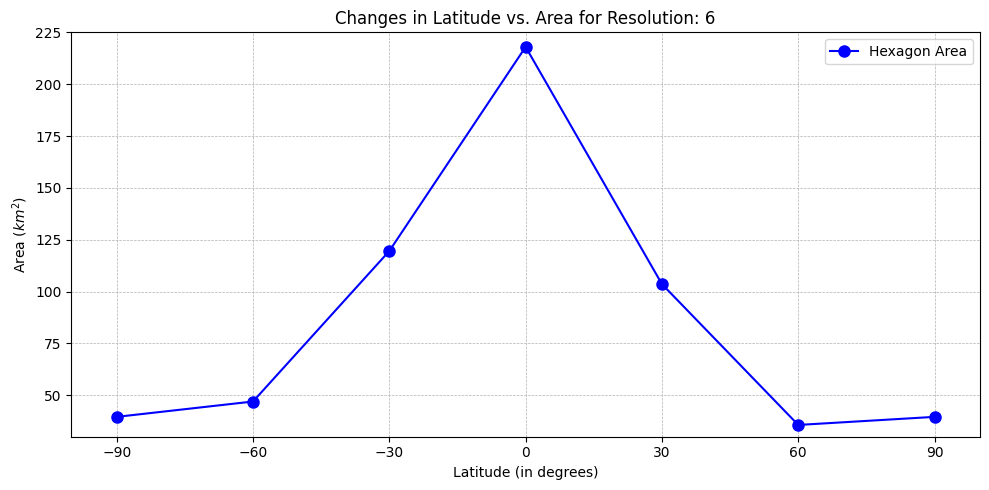


[Changes in Latitude vs. Area for Resolution: 6]
Latitude -90 (deg): Hexagon area = 39.57 (km2)
Latitude -60 (deg): Hexagon area = 46.98 (km2)
Latitude -30 (deg): Hexagon area = 119.55 (km2)
Latitude 0 (deg): Hexagon area = 217.97 (km2)
Latitude 30 (deg): Hexagon area = 103.59 (km2)
Latitude 60 (deg): Hexagon area = 35.68 (km2)
Latitude 90 (deg): Hexagon area = 39.57 (km2)

[Changes in Resolution vs. Area - [0-15]]
Resolution 0 has 1281.256011000 (km) per edge.
Resolution 1 has 483.056839100 (km) per edge.
Resolution 2 has 182.512956500 (km) per edge.
Resolution 3 has 68.979221790 (km) per edge.
Resolution 4 has 26.071759680 (km) per edge.
Resolution 5 has 9.854090990 (km) per edge.
Resolution 6 has 3.724532667 (km) per edge.
Resolution 7 has 1.406475763 (km) per edge.
Resolution 8 has 0.531414010 (km) per edge.
Resolution 9 has 0.200786148 (km) per edge.
Resolution 10 has 0.075863783 (km) per edge.
Resolution 11 has 0.028663897 (km) per edge.
Resolution 12 has 0.010830188 (km) per ed

In [4]:
descritizer = Discretizer(resolution=6)
descritizer.describe()

# Using Tracks for Discretization

In [19]:
tracks = aisdb.track_gen.TrackGen(rowgen, decimate=True)
tracks_segment = aisdb.track_gen.split_timedelta(tracks,
                                                     timedelta(weeks=4))
tracks_with_indexes = descritizer.yield_tracks_discretized_by_indexes(tracks)

In [20]:
tracks_copy1,tracks_copy2,tracks_copy3,tracks_copy4 = itertools.tee(tracks_with_indexes, 4)

for track in tracks_copy1:
    print(f"H3 Index for lat {track['lat'][0]}, lon {track['lon'][0]}: {track['h3_index'][0]}")
    break

H3 Index for lat 50.003334045410156, lon -66.76000213623047: 860e4d31fffffff
